In [99]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("car_data.csv" )

In [ ]:
#CONTRIBUȚIA LA PROIECT

#-fiecare dintre noi am contribuit în mod egal la realizarea acestui proiect deoarece de fiecare dată când am lucrat la acesta,
#ne-am întâlnit și am discutat, iar apoi am implementat ideile fiecăreia.

In [100]:
df.describe()

#LEGENDĂ ATRIBUTE
#-year: anul producției automobilului
#selling_price: prețul de vânzare al unei mașini utilizate
#present_price: prețul cu care e vândută o mașină după fabricație (neutilizată)
#km_driven: kilometri reali
#fuel: combustibil  (diesel, GPL, benzina)
#seller_type: tipul de vânzător (dealer, persoană fizică)
#transmission: cutie automată sau manuală
#owner: nr. de proprietari 


,year,selling_price,present_price,km_driven,owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   year           301 non-null    int64  
 2   selling_price  301 non-null    float64
 3   present_price  301 non-null    float64
 4   km_driven      301 non-null    int64  
 5   fuel           301 non-null    object 
 6   seller_type    301 non-null    object 
 7   transmission   301 non-null    object 
 8   owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [102]:
print("Numarul de linii si coloane:")
df.shape

Numarul de linii si coloane:


(301, 9)

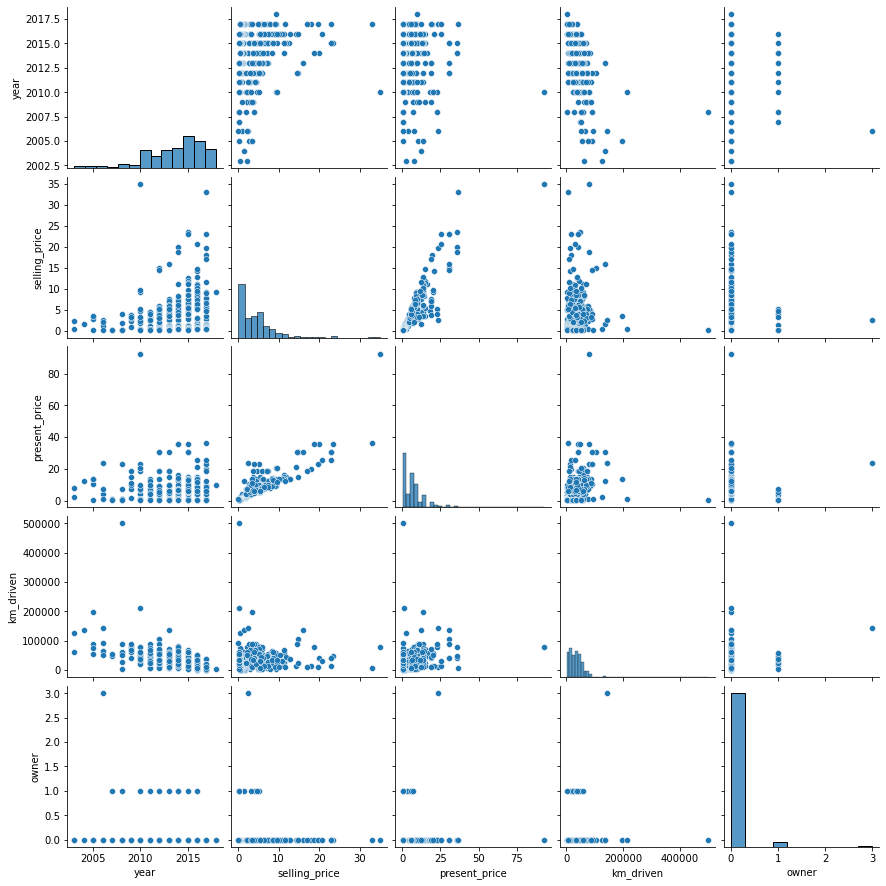

In [103]:
sns.pairplot(df)

#Distribuția numărului de mașini în funcție de atributele importante

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='seller_type', ylabel='selling_price'>

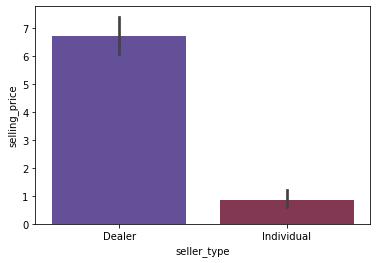

In [104]:
sns.barplot('seller_type','selling_price',data=df,palette='twilight')

#Raportul dintre mașinile care sunt vândute de către dealeri si cele vândute de persoane fizice

C:\Users\Andy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

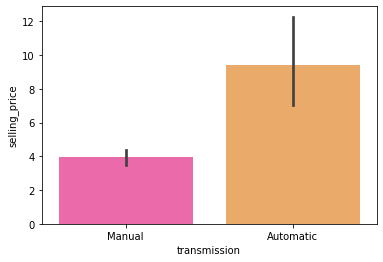

In [7]:
sns.barplot('transmission','selling_price',data=df,palette='spring')

#Raportul dintre mașinile care au cutie automată și care au cutie manuală

C:\Users\Andy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

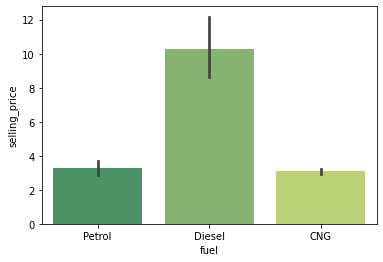

In [10]:
sns.barplot('fuel','selling_price',data=df,palette='summer')

#Raportul dintre prețul mașinilor care utilizează benzină, motorină sau CNG

C:\Users\Andy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='selling_price', ylabel='year'>

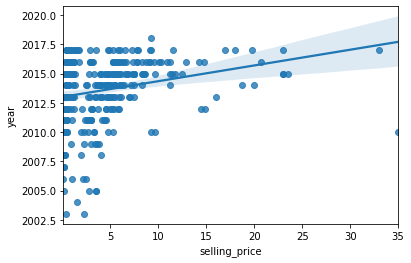

In [11]:
sns.regplot('selling_price','year',data=df)

#Distribuția prețurilor în funcție de ani (2016-2017)

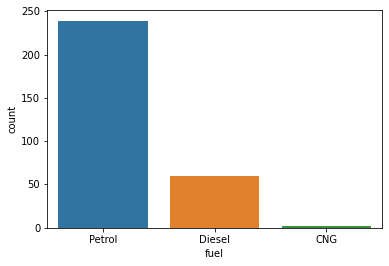

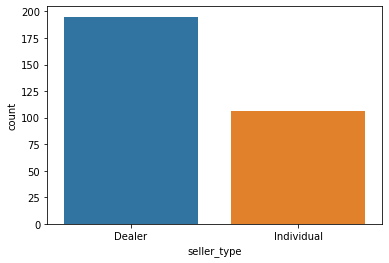

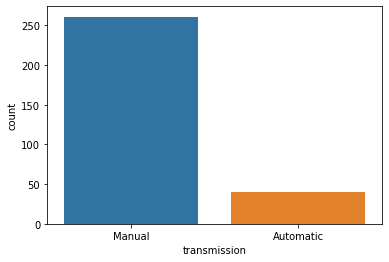

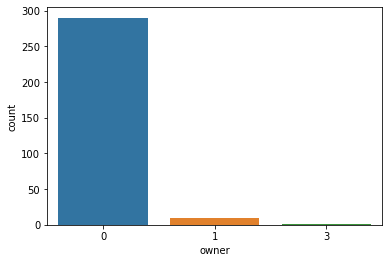

In [12]:
import seaborn as sns
categorii= ['fuel', 'seller_type', 'transmission', 'owner']

for i in categorii:
    sns.countplot(x=i, data = df)
    plt.show()
    
    
#Gruparea mașinilor în funcție de anumite criterii:
#combustibil
#prorpietar
#vânzător
  

In [24]:
df.groupby("owner").agg(
   Numar_proprietari=("owner", "count")
)

#Cele mai multe masini au avut un singur proprietar

,Numar_proprietari
owner,
0,290
1,10
3,1


In [25]:
df.pivot_table(columns='fuel', values='selling_price', aggfunc=['mean', 'count'])

#Media in functie de carburant


mean                    count              
fuel           CNG   Diesel    Petrol   CNG Diesel Petrol
selling_price  3.1  10.2785  3.264184     2     60    239

In [26]:
df.groupby("transmission").agg(
   Numar_masini_in_fct_transmisie=("transmission", "count")
)


#Sunt mai multe masini cu transmisie manuală, mai exact cu 221.

,Numar_masini_in_fct_transmisie
transmission,
Automatic,40
Manual,261


<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

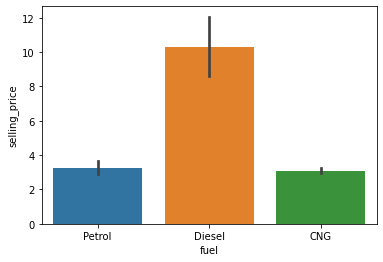

In [16]:
sns.barplot(x=df["fuel"], y=df["selling_price"])

#Prețurile în funcție de combustibilul mașinii

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '2003'),
  Text(1, 0, '2004'),
  Text(2, 0, '2005'),
  Text(3, 0, '2006'),
  Text(4, 0, '2007'),
  Text(5, 0, '2008'),
  Text(6, 0, '2009'),
  Text(7, 0, '2010'),
  Text(8, 0, '2011'),
  Text(9, 0, '2012'),
  Text(10, 0, '2013'),
  Text(11, 0, '2014'),
  Text(12, 0, '2015'),
  Text(13, 0, '2016'),
  Text(14, 0, '2017'),
  Text(15, 0, '2018')])

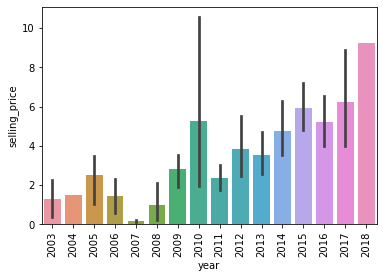

In [17]:
sns.barplot(x=df["year"], y=df["selling_price"], )
plt.xticks(rotation=90)

#In anul 2018, prețul mașinilor a crescut semnificativ

In [27]:
df.groupby("fuel").agg(
        Selling_price_mediu = ("selling_price", "mean"),
  selling_price_min = ("selling_price", "min"),
  selling_price_max = ("selling_price", "max"),
  )


#Media, minimul și maximul prețului de vânzare
#Mașinile pe motorină au, în medie, cel mai mare preț    (prețurile fiind măsurate în moneda indiană, rupie indiană.Valorile afișate)
#sunt minimizate cu 10.000.

,Selling_price_mediu,selling_price_min,selling_price_max
fuel,,,
CNG,3.100000,2.95,3.25
Diesel,10.278500,3.10,35.00
Petrol,3.264184,0.10,19.75


In [28]:
selling_price = pd.to_numeric(df['selling_price'])
impute_value = selling_price.mean()
print("Media este:")
print(impute_value)

#Media prețurilor de vânzare

Media este:
4.661295681063127


In [22]:
df.groupby("owner").agg(

  selling_price_min = ("selling_price", "min"),
  selling_price_max = ("selling_price", "max"))

#Minimul și maximul prețului de vânzare în funcție de proprietar

,selling_price_min,selling_price_max
owner,,
0,0.10,35.00
1,0.15,5.25
3,2.50,2.50


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


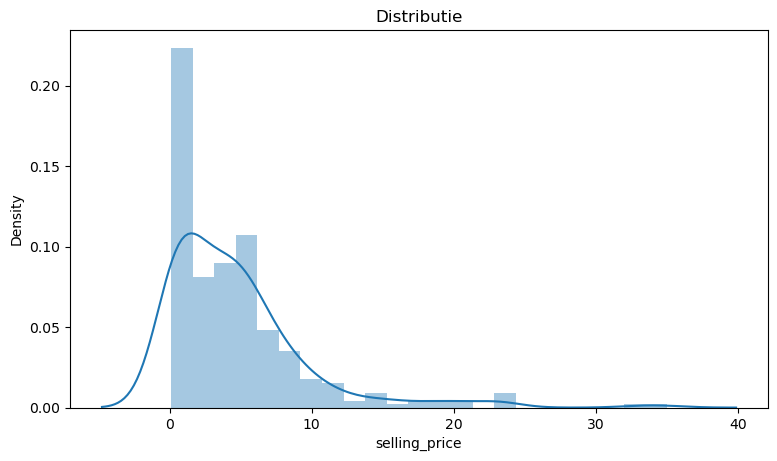

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


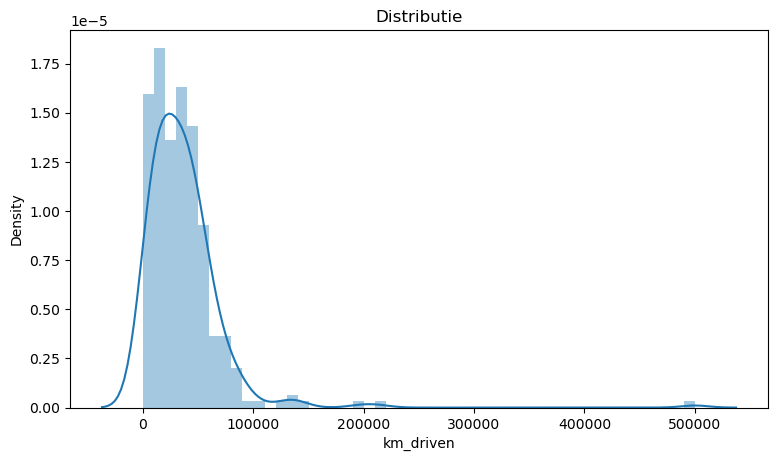

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


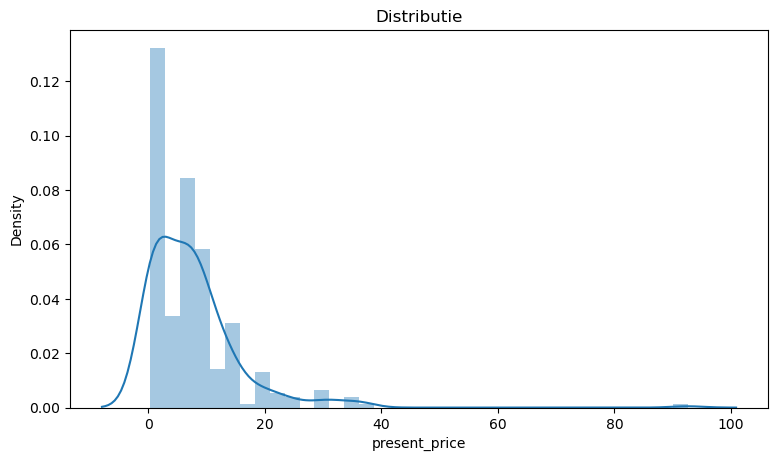

In [29]:
#Distributie(densitatea) in functie de pretul de vanzare, nr de kilometri si de prețul prezent.

ls = ['selling_price' , 'km_driven', 'present_price']
for i in ls:
    plt.figure(dpi=100 ,figsize=(9 ,5))
    plt.title( 'Distributie')
    sns.distplot(x=df[i])
    plt.xlabel(i)
    plt.show()

In [23]:
df.isnull().sum()

#pentru a vedea daca exista valori nule
#nu exista valori nule

Car_Name         0
year             0
selling_price    0
present_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   year           301 non-null    int64  
 2   selling_price  301 non-null    float64
 3   present_price  301 non-null    float64
 4   km_driven      301 non-null    int64  
 5   fuel           301 non-null    object 
 6   seller_type    301 non-null    object 
 7   transmission   301 non-null    object 
 8   owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [28]:
#variabile categoriale

for col in ['fuel','seller_type','transmission']:
    print(f'{col}')
    print(df[col].unique())
    print(" ")

fuel
['Petrol' 'Diesel' 'CNG']
 
seller_type
['Dealer' 'Individual']
 
transmission
['Manual' 'Automatic']
 


In [35]:
#folosim dummies pentru a transforma variabilele categoriale
col_binare = [col for col in df.columns if df[col].dtype in ["O"] and col != "Car_Name"]

df = pd.get_dummies(df, columns=col_binare, drop_first=False)
#prelucram coloana year pentru a afla varsta masinii

df['age']=2020- df['year']
#eliminam coloanele car name si year
df.drop(['year', 'Car_Name'], axis=1, inplace= True)
df.head()

,selling_price,present_price,km_driven,owner,fuel_CNG,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Automatic,transmission_Manual,age
0,3.35,5.59,27000,0,0,0,1,1,0,0,1,6
1,4.75,9.54,43000,0,0,1,0,1,0,0,1,7
2,7.25,9.85,6900,0,0,0,1,1,0,0,1,3
3,2.85,4.15,5200,0,0,0,1,1,0,0,1,9
4,4.60,6.87,42450,0,0,1,0,1,0,0,1,6


In [150]:
print("Quartilele împart scara prețurilor în 4 intervale egale")
print(" ");
print("Prima quartilă (Q1) delimitează cele mai mici 25% din date.")
print(" ");
print("A doua quartilă (Q2) delimitează cele mai mici 50% din date / împarte setul în două si este egală cu mediana.")
print(" ");
print("A patra quartilă (Q4) delimitează cele mai mari 25% din date.")
print(" ");
print("Valorile quartilelor:")
print(" ");


print("Q1  : ", np.quantile(selling_price, .25)) 


print("Q2  : ", np.quantile(selling_price, .50)) 
print("Q3: ", np.quantile(selling_price, .75))

Quartilele împart scara prețurilor în 4 intervale egale
 
Prima quartilă (Q1) delimitează cele mai mici 25% din date.
 
A doua quartilă (Q2) delimitează cele mai mici 50% din date / împarte setul în două si este egală cu mediana.
 
A patra quartilă (Q4) delimitează cele mai mari 25% din date.
 
Valorile quartilelor:
 
Q1  :  0.9
Q2  :  3.6
Q3:  6.0


In [151]:
print("Mediana reprezintă acea valoare a unei serii ordonate crescător sau descrescător care împarte seria în două părți egale, așa încât 50% din termenii seriei au valori mai mici decât mediana, iar 50% mai mari decât mediana.")
print(" ");
print("Mediana  : ", np.median(selling_price))

#Valoarea medianei corespunde valorii celei de-a doua quartile.

Mediana reprezintă acea valoare a unei serii ordonate crescător sau descrescător care împarte seria în două părți egale, așa încât 50% din termenii seriei au valori mai mici decât mediana, iar 50% mai mari decât mediana.
 
Mediana  :  3.6


In [55]:
#DEVIATIA STANDARD
print("Deviatia standard a unui set de date permite estimarea uniformităţii valorilor acestuia, mai precis, cu cât valoarea acesteia este mai mică cu atât valorile setului sunt grupate în jurul valorii medii. Invers, cu cât deviatia standard este mai mare, cu atât valorile setului sunt mai depărtate faţă de valoarea medie.")
print(" ")

print("Valoare:")
print(np.std(selling_price))

Deviatia standard a unui set de date permite estimarea uniformităţii valorilor acestuia, mai precis, cu cât valoarea acesteia este mai mică cu atât valorile setului sunt grupate în jurul valorii medii. Invers, cu cât deviatia standard este mai mare, cu atât valorile setului sunt mai depărtate faţă de valoarea medie.
 
Valoare:
5.074361323307891


In [152]:
df.corr()

,selling_price,present_price,km_driven,owner,fuel_CNG,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Automatic,transmission_Manual,age
selling_price,1.000000,0.878983,0.029187,-0.088344,-0.025164,0.552339,-0.540571,0.550724,-0.550724,0.367128,-0.367128,-0.236141
present_price,0.878983,1.000000,0.203647,0.008057,-0.011500,0.473306,-0.465244,0.512030,-0.512030,0.348715,-0.348715,0.047584
km_driven,0.029187,0.203647,1.000000,0.089216,0.012223,0.172515,-0.172874,0.101419,-0.101419,0.162510,-0.162510,0.524342
owner,-0.088344,0.008057,0.089216,1.000000,-0.014272,-0.053469,0.055687,-0.124269,0.124269,0.050316,-0.050316,0.182104
fuel_CNG,-0.025164,-0.011500,0.012223,-0.014272,1.000000,-0.040808,-0.160577,0.060300,-0.060300,-0.032018,0.032018,0.017790
fuel_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.040808,1.000000,-0.979648,0.350467,-0.350467,0.098643,-0.098643,-0.064315
fuel_Petrol,-0.540571,-0.465244,-0.172874,0.055687,-0.160577,-0.979648,1.000000,-0.358321,0.358321,-0.091013,0.091013,0.059959
seller_type_Dealer,0.550724,0.512030,0.101419,-0.124269,0.060300,0.350467,-0.358321,1.000000,-1.000000,0.063240,-0.063240,-0.039896
seller_type_Individual,-0.550724,-0.512030,-0.101419,0.124269,-0.060300,-0.350467,0.358321,-1.000000,1.000000,-0.063240,0.063240,0.039896
transmission_Automatic,0.367128,0.348715,0.162510,0.050316,-0.032018,0.098643,-0.091013,0.063240,-0.063240,1.000000,-1.000000,0.000394


<AxesSubplot:>

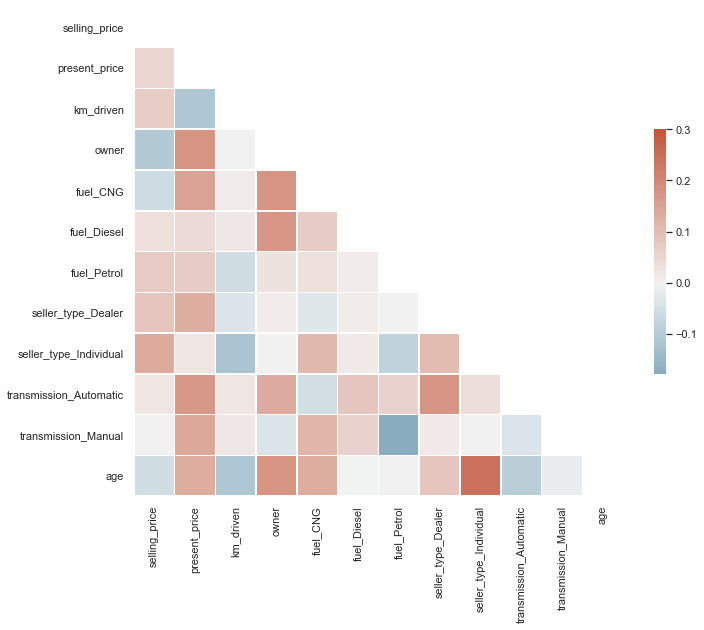

In [153]:
sns.set_theme(style="white")
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 12)),
                 columns=list(df))
corr = d.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#Cele mai mari corelații existente sunt între present price și selling price , fuel_Diesel și selling price, seller_type_dealer și 
#selling price, age și selling price (invers proporțională)

In [36]:
x=df.drop(['selling_price'],axis=1)
x.head()

#Eliminarea atributului selling_price (deoarece acesta urmează să fie prezis)

,present_price,km_driven,owner,fuel_CNG,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Automatic,transmission_Manual,age
0,5.59,27000,0,0,0,1,1,0,0,1,6
1,9.54,43000,0,0,1,0,1,0,0,1,7
2,9.85,6900,0,0,0,1,1,0,0,1,3
3,4.15,5200,0,0,0,1,1,0,0,1,9
4,6.87,42450,0,0,1,0,1,0,0,1,6


In [37]:
y=df['selling_price']
y.head()


0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: selling_price, dtype: float64

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

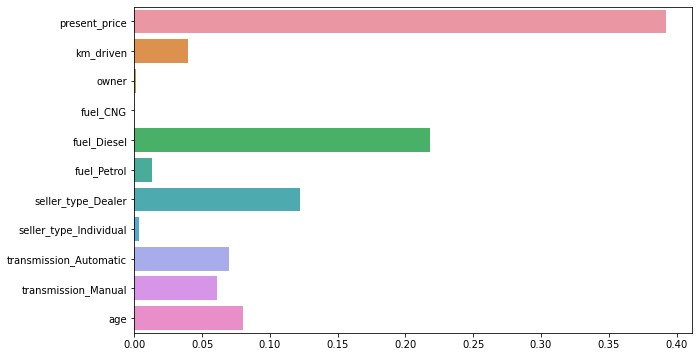

In [38]:

from sklearn.ensemble import ExtraTreesRegressor
ec= ExtraTreesRegressor()
ec.fit(x,y)
ExtraTreesRegressor()
fig= plt.subplots(figsize=(10,6))
imp= pd.Series(ec.feature_importances_, index=x.columns)
sns.barplot(imp, imp.index)


#Importanța variabilelor
#Cele mai importante atribute sunt present_price, fuel_Diesel si seller_type_Dealer

In [39]:
df.head()

,selling_price,present_price,km_driven,owner,fuel_CNG,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Automatic,transmission_Manual,age
0,3.35,5.59,27000,0,0,0,1,1,0,0,1,6
1,4.75,9.54,43000,0,0,1,0,1,0,0,1,7
2,7.25,9.85,6900,0,0,0,1,1,0,0,1,3
3,2.85,4.15,5200,0,0,0,1,1,0,0,1,9
4,4.60,6.87,42450,0,0,1,0,1,0,0,1,6


In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)
lr= LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [41]:
algos= {
        'Decision Tree Regressor' : {'model' : DecisionTreeRegressor(),
                                    'para' : {'criterion': ['mse', 'mae', 'friedman_mse'],
                                             'splitter': ['best', 'random'],'min_samples_split':[2,5,10,7]}
                                    },
        'Random Forest Regressor' : {'model' : RandomForestRegressor(),
                                     'para' :{'criterion' : ['mse', 'mae'],'max_depth' : [1,2,5,7],
                                              'n_estimators':[10,25,50,100,200,250,400,500],
                                              'max_features': ['auto', 'sqrt', 'log2']}
                                    }
        }
#Regresie cu random forest

In [42]:
result=[]
from sklearn.model_selection import RandomizedSearchCV
for algo, param in algos.items():
    rs=  RandomizedSearchCV(param['model'], param['para'], n_iter= 5, cv=3, scoring='neg_mean_squared_error')
    rs.fit(x_train,y_train)
    ypred= rs.predict(x_test)
    result.append(pd.Series({'model': algo,
                            'score': rs.best_score_, 
                            'parameter': rs.best_params_}))

In [43]:
pd.options.display.max_colwidth=100
results = pd.concat(result, axis= 1).T.set_index('model')
results

,score,parameter
model,,
Decision Tree Regressor,-4.099944,"{'splitter': 'best', 'min_samples_split': 7, 'criterion': 'mse'}"
Random Forest Regressor,-4.799884,"{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 7, 'criterion': 'mse'}"


In [44]:
rf2= RandomForestRegressor(n_estimators= 500, max_features= 'auto', max_depth= 7, criterion= 'mse')
rf2.fit(x_train, y_train)
ypred2= rf2.predict(x_test)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

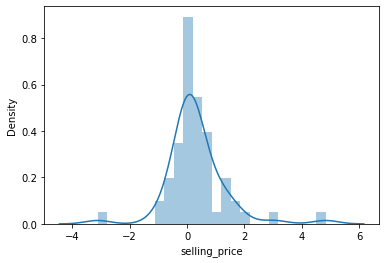

In [45]:
sns.distplot(y_test-ypred2)

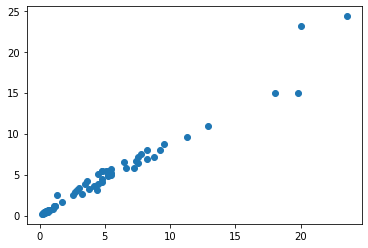

In [46]:
plt.scatter(y_test, ypred2)

In [47]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, ypred2))


print('MSE:', metrics.mean_squared_error(y_test, ypred2))


print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypred2)))

#Am folosit RandomForestRegression pentru a determina valorile MAE, RMSE, MSE

MAE: 0.6159828232098106
MSE: 1.1034879033701126
RMSE: 1.0504703248403129


In [48]:
lr= LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [61]:
train_data , test_data = train_test_split(df, test_size = 0.2 , random_state = 42)
num_cols = ['age','selling_price','present_price','km_driven']
scaler = StandardScaler()
train_data[num_cols] = scaler.fit_transform(train_data[num_cols])
test_data[num_cols] = scaler.transform(test_data[num_cols])


#Am folosit regresia lineara si am calculat MAE, RMSE, MSE

<ipython-input-61-4bf4abebc3b9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[num_cols] = scaler.fit_transform(train_data[num_cols])
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-61-4bf4abebc3b9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [67]:
x_train = train_data.drop(['selling_price'], axis = 1) 
y_train = train_data['selling_price']
x_test = test_data.drop(['selling_price'], axis = 1) 
y_test = test_data['selling_price']

#Am prezis valoarea selling_price și am calculat diferența dintre valoarea prezisă și valoarea inițială.

In [68]:
print(train_data.shape)
print(test_data.shape)

(240, 12)
(61, 12)


In [64]:
df.head(10)

,selling_price,present_price,km_driven,owner,fuel_CNG,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Automatic,transmission_Manual,age
0,3.35,5.59,27000,0,0,0,1,1,0,0,1,6
1,4.75,9.54,43000,0,0,1,0,1,0,0,1,7
2,7.25,9.85,6900,0,0,0,1,1,0,0,1,3
3,2.85,4.15,5200,0,0,0,1,1,0,0,1,9
4,4.60,6.87,42450,0,0,1,0,1,0,0,1,6
5,9.25,9.83,2071,0,0,1,0,1,0,0,1,2
6,6.75,8.12,18796,0,0,0,1,1,0,0,1,5
7,6.50,8.61,33429,0,0,1,0,1,0,0,1,5
8,8.75,8.89,20273,0,0,1,0,1,0,0,1,4
9,7.45,8.92,42367,0,0,1,0,1,0,0,1,5


In [105]:
model = LinearRegression()
model.fit(x_train, y_train)
predicted = model.predict(x_test)

print("Eroarea medie absolută : "+str(metrics.mean_absolute_error(predicted , y_test)))
print("Abaterea medie pătratică  : "+str(metrics.mean_squared_error(predicted , y_test)))
print("Media pătratică(RMSE) : "+str(np.sqrt(metrics.mean_squared_error(predicted , y_test))))

print("R2 Score(coeficientul de determinare) : "+str(metrics.r2_score(predicted , y_test)))


#Eroarea medie absolută ( MAE ) este o măsură a erorilor între observațiile pereche care exprimă același fenomen.

#Eroarea pătratică medie ( MSE )sau abaterea pătrată mediemăsoară media pătratelor erorilor 
# ,adică diferența medie pătrată între valorile estimate şi valoarea reală. 

#Root Mean Squared Error (RMSE) reprezintă abaterea dintre valorile prezise și valorile actuale.

#Coeficientul de determinare reprezintă proporția variabilei independente care este previzibilă în variabila independentă.

Eroarea medie absolută : 0.2365416476113683
Abaterea medie pătratică  : 0.13158817158799938
Media pătratică(RMSE) : 0.3627508395414122
R2 Score(coeficientul de determinare) : 0.7948624857739327


In [70]:
model = LinearRegression()

In [72]:
model.fit(x_train,y_train)

LinearRegression()

In [73]:
test_predections = model.predict(x_test)

In [80]:
val_reziduala = y_test - test_predections

Text(0, 0.5, 'Eroare reziduală')

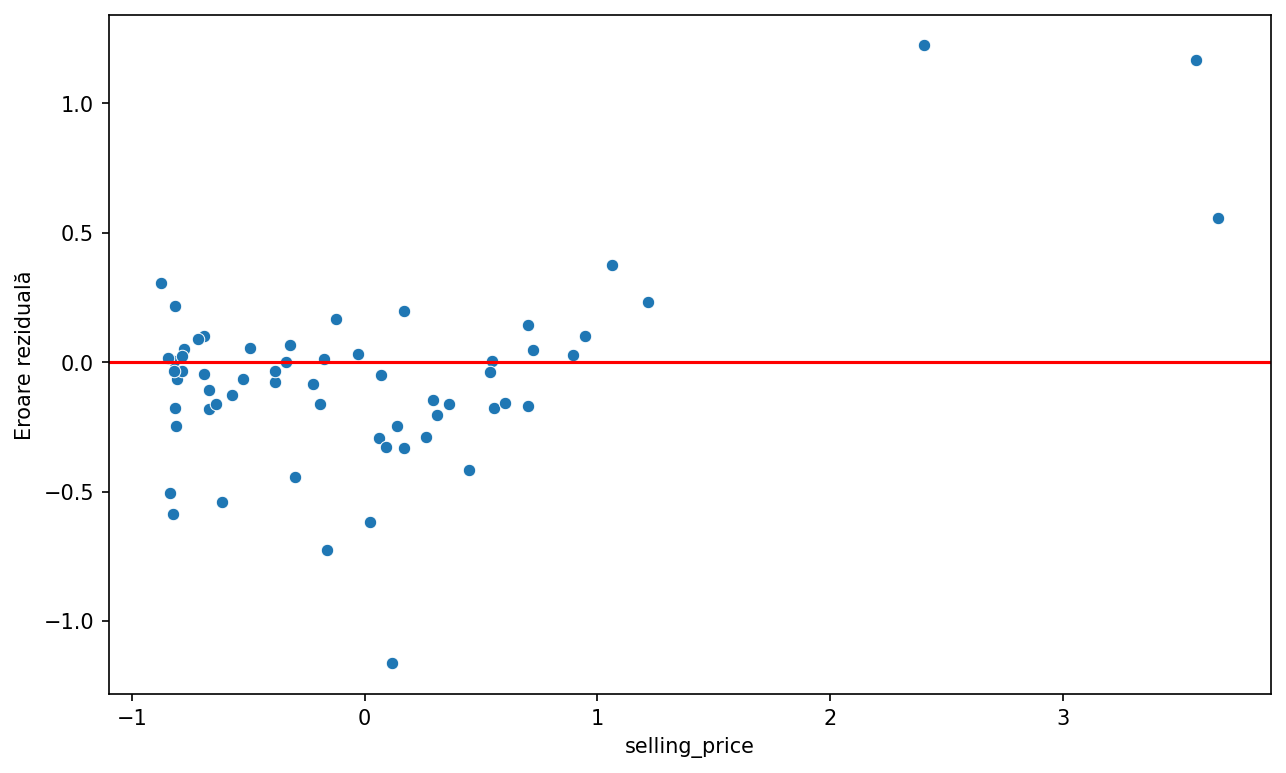

In [81]:
plt.figure(figsize=(10,6),dpi=150)
sns.scatterplot(x=y_test,y=val_reziduala)
plt.axhline(y=0,color ='r')
plt.ylabel('Eroare reziduală')

In [82]:
df['model_prezis'] = np.round(model.predict(x),1)

In [83]:
df

,selling_price,present_price,km_driven,owner,fuel_CNG,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Automatic,transmission_Manual,age,model_predection,Residual,model_prezis
0,3.35,5.59,27000,0,0,0,1,1,0,0,1,6,-1347.4,1350.8,-1347.4
1,4.75,9.54,43000,0,0,1,0,1,0,0,1,7,-2144.5,2149.2,-2144.5
2,7.25,9.85,6900,0,0,0,1,1,0,0,1,3,-338.3,345.6,-338.3
3,2.85,4.15,5200,0,0,0,1,1,0,0,1,9,-258.8,261.7,-258.8
4,4.60,6.87,42450,0,0,1,0,1,0,0,1,6,-2118.8,2123.4,-2118.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,0,1,0,1,0,0,1,4,-1691.7,1701.2,-1691.7
297,4.00,5.90,60000,0,0,0,1,1,0,0,1,5,-2997.4,3001.4,-2997.4
298,3.35,11.00,87934,0,0,0,1,1,0,0,1,11,-4391.9,4395.2,-4391.9
299,11.50,12.50,9000,0,0,1,0,1,0,0,1,3,-441.0,452.5,-441.0


In [84]:

df['Rezidual'] = np.round(df['selling_price'] - df['model_prezis'],1)
df

#Eroarea reziduală este 1350/10.000=0.13, ceea ce înseamnă că la un preț de 33.500 rupi, modelul nostru a prezis cu o diferență de 1347.

,selling_price,present_price,km_driven,owner,fuel_CNG,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Automatic,transmission_Manual,age,model_predection,Residual,model_prezis,Rezidual
0,3.35,5.59,27000,0,0,0,1,1,0,0,1,6,-1347.4,1350.8,-1347.4,1350.8
1,4.75,9.54,43000,0,0,1,0,1,0,0,1,7,-2144.5,2149.2,-2144.5,2149.2
2,7.25,9.85,6900,0,0,0,1,1,0,0,1,3,-338.3,345.6,-338.3,345.6
3,2.85,4.15,5200,0,0,0,1,1,0,0,1,9,-258.8,261.7,-258.8,261.7
4,4.60,6.87,42450,0,0,1,0,1,0,0,1,6,-2118.8,2123.4,-2118.8,2123.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,0,1,0,1,0,0,1,4,-1691.7,1701.2,-1691.7,1701.2
297,4.00,5.90,60000,0,0,0,1,1,0,0,1,5,-2997.4,3001.4,-2997.4,3001.4
298,3.35,11.00,87934,0,0,0,1,1,0,0,1,11,-4391.9,4395.2,-4391.9,4395.2
299,11.50,12.50,9000,0,0,1,0,1,0,0,1,3,-441.0,452.5,-441.0,452.5


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


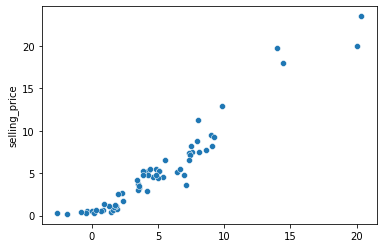

In [58]:
model = LinearRegression()
model.fit(x_train, y_train)
predicted = model.predict(x_test)
sns.scatterplot(predicted , y_test)





In [173]:
df = pd.DataFrame({'Actual':y_test,"Predicted":y_pred})
df.head()

,Actual,Predicted
223,8.25,7.517500
150,0.50,-0.381360
226,5.25,4.255947
296,9.50,9.007192
52,18.00,14.426934


In [ ]:
#MULTICOLINIARITATE

#Toate atributele sunt independete, mai puțin selling price, care a fost prezis.
#Astfel, nu există multicoliniaritate.


In [ ]:
#Prețul present al unei mașini joacă un rol important în prezicerea prețului de vânzare, unul crește direct proporțional cu celălalt.

#Vârsta mașinii afectează negativ prețul prezent al unei mașini, astfel cu cât aceasta este mai veche, cu atât prețul este mai mic.


#Prețul de vânzare al mașinilor cu combustibil Diesel este mai mare.

#Mașinile cu cutie manuală au prețuri mai mici față de cele cu cutie automată.

#Mașinile vândute de persoane fizice tind să coste mai puțin decât cele care sunt vândute de către dealeri.